# Practice 4. Binary Mathematical Morphology

**Perez Bautista David 2016351090 3CV7**



## INTRODUCTION

## BINARY MORPHOLOGY
Morphology is a broad set of image processing operations that process images based on shapes. Morphological operations apply a structuring element to an input image, creating an output image of the same size. In a morphological operation, the value of each pixel in the output image is based on a comparison of the corresponding pixel in the input image with its neighbors.
In this case the values of pixels only are 0 ot 1, and and we operate these values like sets 

  #### UNION IMAGES
  This operation fuse the images.
 
  f(x,y)=x or y 
  where x,y are image's pixels of images A and
  
  #### INTERSECTION IMAGES
  This operation get image that have the pixels  on common between two images.
  
  f(x,y)=x and y 
  where x,y are image's pixels of images A and
 
  #### COMPLEMENT IMAGES
  This operation inverse the value of the pixels, 0 to 255 or 255 to 0.
  
  f(x)=not(x)


  #### ERODE 
  Erosion is one of the two basic operators in the area of mathematical   morphology.The basic effect of the operator on a binary image is to     erode away the boundaries of regions of foreground pixels (i.e. black   pixels, typically).

  For calculate erode we need do a match of pixels between the             structuring element and image, if there is a perfect match  then the 
  value of the output pixel is zero, else the value of output pixel is     one
  
  #### DILATE
  Dilation (usually represented by ⊕) is one of the basic operations in   mathematical morphology. Originally developed for binary images, it     has been expanded first to grayscale images, and then to complete       lattices. The dilation operation usually uses a structuring element     for probing and expanding the shapes contained in the input image.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import timeit
%matplotlib inline
from PIL import Image
%reload_ext Cython


In [2]:
filepath="./" #The current directory
#binfilename="apple3.JPEG" 
binfilename="coinst.PNG" 
bin2filename="apple4.PNG"

pic_bin=Image.open(filepath+binfilename)
pic_bin2=Image.open(filepath+bin2filename)

_bin = np.asarray(pic_bin) #converts the image to an Numpy Array


_bin2 = np.asarray(pic_bin2) #converts the image to an Numpy Array




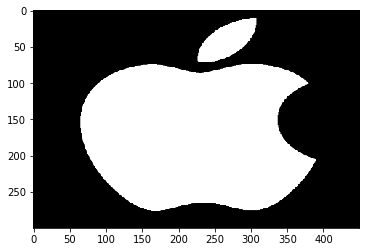

In [3]:
plt.imshow(_bin)
plt.imshow(_bin2)

Union

In [4]:
def union(img1,img2):
    return img1 | img2

def intersection(img1,img2):
    return img1 & img2

def complement(img):
    newimg=img.copy("K")
    newimg[:,:,0:3]=img[:,:,0:3]^np.uint8(255)
    return newimg


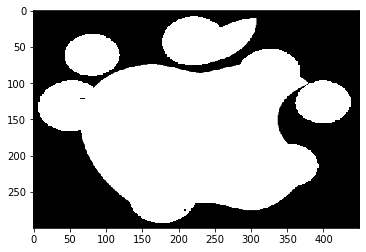

In [5]:
_union=union(_bin,_bin2)
plt.imshow(_union)

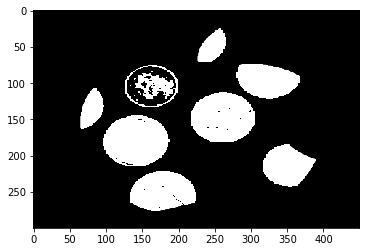

In [6]:
_intersection=intersection(_bin,_bin2)
plt.imshow(_intersection)

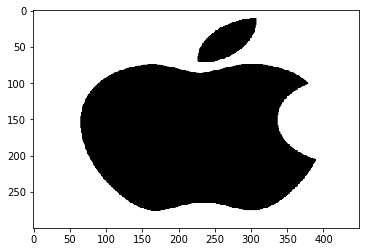

In [7]:
_complement=complement(_bin2)
plt.imshow(_complement)

ERODE AND DILATE

In [8]:
%%cython 
import numpy as np
cimport cython
@cython.boundscheck(False)
@cython.wraparound(False)

#-------------------------EROSION

def Erosion(const unsigned char [:,:,:] imagen,const unsigned char [:,:] struct):  
    cdef erosion=np.zeros((imagen.shape[0]+2,imagen.shape[1]+2,imagen.shape[2]),dtype=np.uint8)
    cdef erosionfinal=np.array(imagen)  
    cdef int i,j
    cdef unsigned char aux
    
    #framework zeros
    erosion[1:erosion.shape[0]-1,1:erosion.shape[1]-1,0]=np.asarray(imagen[:,:,0])
    
    for i in range(0,imagen.shape[0]):
        for j in range(0,imagen.shape[1]):  
            if(erosion[i+1,j+1,0]==0):
                aux=0
                for x in range(0,struct.shape[0]):
                    for y in range(0,struct.shape[1]):
                        if(struct[x,y]==0):
                            aux=np.uint8(aux)|(np.uint8(erosion[i+x,j+y,0])|np.uint8(struct[x,y]))                         
                erosionfinal[i,j,0]=aux
    
    erosionfinal[:,:,1]=erosionfinal[:,:,0]
    erosionfinal[:,:,2]=erosionfinal[:,:,0]
    return erosionfinal

#-------------------------DILATACION-----------------------

def Dilatacion(const unsigned char [:,:,:] imagen,const unsigned char [:,:] struct):  
    cdef erosion=np.zeros((imagen.shape[0]+2,imagen.shape[1]+2,imagen.shape[2]),dtype=np.uint8)
    cdef erosionfinal=np.array(imagen)  
    cdef int i,j
    cdef unsigned char aux
    
    #framework zeros
    erosion[1:erosion.shape[0]-1,1:erosion.shape[1]-1,0]=np.asarray(imagen[:,:,0])
    
    for i in range(0,imagen.shape[0]):
        for j in range(0,imagen.shape[1]): 
            for x in range(0,struct.shape[0]):
                for y in range(0,struct.shape[1]):
                    if(struct[x,y]==erosion[i+x,j+y,0] and struct[x,y]==0):
                        erosionfinal[i,j,0]=0                        
                
    
    erosionfinal[:,:,1]=erosionfinal[:,:,0]
    erosionfinal[:,:,2]=erosionfinal[:,:,0]
    return erosionfinal




In [9]:
## Introducir mascara  invertida
#Su origen siempre sera 1,1

img=np.array([[255, 255, 255, 255, 255, 255],
              [  0,   0,   0,  0,    0,   0],
              [255,   0, 255, 255, 255, 255],
              [255,   0, 255, 255, 255, 255],
              [255,   0, 255, 255, 255, 255],
              [255,   0, 255, 255, 255, 255]
                   ],dtype=np.uint8)

img2=np.array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
               [255,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255],
               [255,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255],
               [255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
               [255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
               [255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
               [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]
                  ],dtype=np.uint8)

imagen=np.zeros((img2.shape[0],img2.shape[1],3),dtype=np.uint8)
imagen[:,:,0]=img2
imagen[:,:,1]=img2
imagen[:,:,2]=img2

struct=np.array([[255,   0, 255],
                 [  0,   0,   0],
                 [255,   0, 255]
                   ],dtype=np.uint8)

struct2=np.array([[  0,   0,   0],
                  [  0,   0,   0],
                  [  0,   0,   0]
                   ],dtype=np.uint8)


origin=np.array([1,1], dtype=np.uint8)



(700, 700, 3)

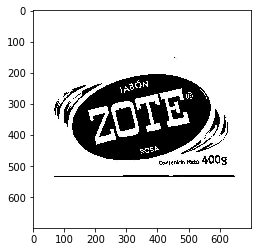

In [10]:
binfilename="binaria.JPEG"
pic_bin=Image.open(filepath+binfilename)
_bin = np.asarray(pic_bin) #converts the image to an Numpy Array
plt.imshow(_bin)
_bin.shape


CPU times: user 5.38 s, sys: 48.1 ms, total: 5.43 s
Wall time: 5.39 s


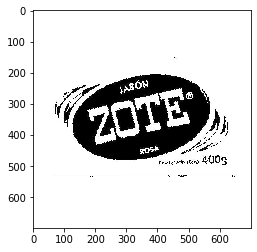

In [11]:
%%time
A=Erosion(_bin,struct2)
plt.imshow(A)


CPU times: user 19.7 s, sys: 68.7 ms, total: 19.8 s
Wall time: 19.6 s


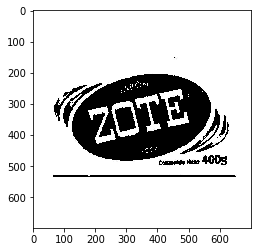

In [12]:
%%time
A=Dilatacion(_bin,struct2)
plt.imshow(A)

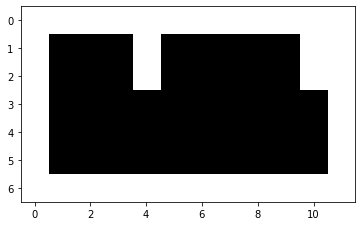

In [13]:
plt.imshow(imagen)

CPU times: user 47.3 ms, sys: 0 ns, total: 47.3 ms
Wall time: 51 ms


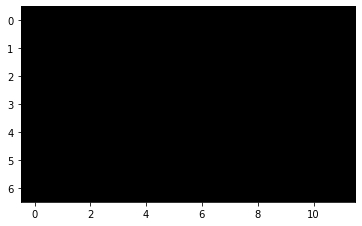

In [16]:
%%time
A=Dilatacion(imagen,struct2)
plt.imshow(A)

## CONCLUTIONS
Finally we have different operations for manipulate images and see characteristics of these,  the most difficult operation to programmer is the convolution, this operation is more complex than other operations in a binary images or grayscale images. In the others operations just get the pixels that to manipulated and we should to applicate some logic or arithmetic  operators in the pixel's  values.  
We can to get the internal or external borders of the figures in the image, but the time of the algorithm can be long if you programme worst the algorithm.